In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# 1.Problem Statement

# 2.Data Gathering

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4.Feature Engineering

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [6]:
df['Embarked'].mode()[0]

'S'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df["Cabin"].value_counts().to_dict()

{'B96 B98': 4,
 'G6': 4,
 'C23 C25 C27': 4,
 'C22 C26': 3,
 'F33': 3,
 'F2': 3,
 'E101': 3,
 'D': 3,
 'C78': 2,
 'C93': 2,
 'E8': 2,
 'D36': 2,
 'B77': 2,
 'C123': 2,
 'E121': 2,
 'E44': 2,
 'D35': 2,
 'C125': 2,
 'E67': 2,
 'B35': 2,
 'B18': 2,
 'E24': 2,
 'B49': 2,
 'C65': 2,
 'B20': 2,
 'B5': 2,
 'B57 B59 B63 B66': 2,
 'C126': 2,
 'B51 B53 B55': 2,
 'F4': 2,
 'C124': 2,
 'F G73': 2,
 'B58 B60': 2,
 'C52': 2,
 'D33': 2,
 'C68': 2,
 'D20': 2,
 'D26': 2,
 'B28': 2,
 'C83': 2,
 'E25': 2,
 'D17': 2,
 'B22': 2,
 'C92': 2,
 'C2': 2,
 'E33': 2,
 'C70': 1,
 'E58': 1,
 'A16': 1,
 'C86': 1,
 'D19': 1,
 'D48': 1,
 'A26': 1,
 'B50': 1,
 'A20': 1,
 'C101': 1,
 'A10': 1,
 'A23': 1,
 'E68': 1,
 'D9': 1,
 'B41': 1,
 'D50': 1,
 'C85': 1,
 'B71': 1,
 'D49': 1,
 'B42': 1,
 'C50': 1,
 'A24': 1,
 'E17': 1,
 'D28': 1,
 'C47': 1,
 'E49': 1,
 'B69': 1,
 'B102': 1,
 'A36': 1,
 'B82 B84': 1,
 'D6': 1,
 'B3': 1,
 'F38': 1,
 'E77': 1,
 'D11': 1,
 'D30': 1,
 'C46': 1,
 'D45': 1,
 'B101': 1,
 'B38': 1,
 'C45': 1,

In [9]:
df["Name"].value_counts().to_dict()

{'Braund, Mr. Owen Harris': 1,
 'Boulos, Mr. Hanna': 1,
 'Frolicher-Stehli, Mr. Maxmillian': 1,
 'Gilinski, Mr. Eliezer': 1,
 'Murdlin, Mr. Joseph': 1,
 'Rintamaki, Mr. Matti': 1,
 'Stephenson, Mrs. Walter Bertram (Martha Eustis)': 1,
 'Elsbury, Mr. William James': 1,
 'Bourke, Miss. Mary': 1,
 'Chapman, Mr. John Henry': 1,
 'Van Impe, Mr. Jean Baptiste': 1,
 'Leitch, Miss. Jessie Wills': 1,
 'Johnson, Mr. Alfred': 1,
 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")': 1,
 'Taussig, Miss. Ruth': 1,
 'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)': 1,
 'Slabenoff, Mr. Petco': 1,
 'Harrington, Mr. Charles H': 1,
 'Torber, Mr. Ernst William': 1,
 'Homer, Mr. Harry ("Mr E Haven")': 1,
 'Lindell, Mr. Edvard Bengtsson': 1,
 'Karaic, Mr. Milan': 1,
 'Daniel, Mr. Robert Williams': 1,
 'Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)': 1,
 'Shutes, Miss. Elizabeth W': 1,
 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)': 1,
 'Jarvis, Mr. John Denzil': 1,
 'Paulner, Mr. Usche

In [10]:
df["Gender"].value_counts().to_dict()

{'male': 577, 'female': 314}

In [11]:
df["Ticket"].value_counts().to_dict()

{'347082': 7,
 'CA. 2343': 7,
 '1601': 7,
 '3101295': 6,
 'CA 2144': 6,
 '347088': 6,
 'S.O.C. 14879': 5,
 '382652': 5,
 'LINE': 4,
 'PC 17757': 4,
 '17421': 4,
 '349909': 4,
 '113760': 4,
 '4133': 4,
 '113781': 4,
 'W./C. 6608': 4,
 '2666': 4,
 '19950': 4,
 '347077': 4,
 'C.A. 31921': 3,
 'PC 17572': 3,
 'C.A. 34651': 3,
 '363291': 3,
 'F.C.C. 13529': 3,
 '345773': 3,
 '248727': 3,
 '24160': 3,
 '29106': 3,
 'SC/Paris 2123': 3,
 '35273': 3,
 '371110': 3,
 '230080': 3,
 'PC 17760': 3,
 '239853': 3,
 'PC 17582': 3,
 '347742': 3,
 '110152': 3,
 '13502': 3,
 '110413': 3,
 'PC 17755': 3,
 'PC 17558': 2,
 '237736': 2,
 '17474': 2,
 'PC 17758': 2,
 'PP 9549': 2,
 'S.O./P.P. 3': 2,
 'P/PP 3381': 2,
 'PC 17485': 2,
 '2668': 2,
 '2627': 2,
 'PC 17604': 2,
 '2653': 2,
 '2665': 2,
 '113798': 2,
 '31027': 2,
 '2908': 2,
 'W./C. 6607': 2,
 'WE/P 5735': 2,
 '35281': 2,
 '113789': 2,
 '244367': 2,
 '231919': 2,
 '110465': 2,
 'PC 17477': 2,
 '2699': 2,
 '367226': 2,
 '113806': 2,
 '230136': 2,
 '1113

In [12]:
df["Embarked"].value_counts().to_dict()

{'S': 646, 'C': 168, 'Q': 77}

In [13]:
# Handling Encoding Values
df["Gender"].value_counts().to_dict()
df["Embarked"].value_counts().to_dict()

{'S': 646, 'C': 168, 'Q': 77}

In [14]:
df["Gender"].replace({'male': 0, 'female': 1},inplace=True)

In [15]:
df["Embarked"].replace({'S': 0, 'C': 1, 'Q': 2},inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [17]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=True,inplace=True)

In [18]:
x=df.drop("Survived",axis=1)

In [19]:
x

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [20]:
y=df["Survived"]

<AxesSubplot:xlabel='Pclass'>

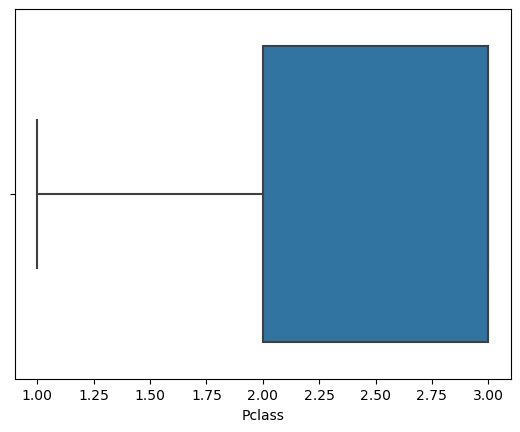

In [21]:
sns.boxplot(df["Pclass"])

<AxesSubplot:xlabel='Age'>

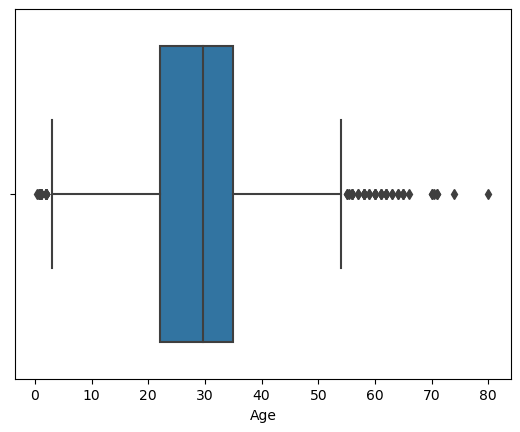

In [22]:
sns.boxplot(df["Age"])

upper_tail: 54.5
lower_tail: 2.5


<AxesSubplot:xlabel='Age'>

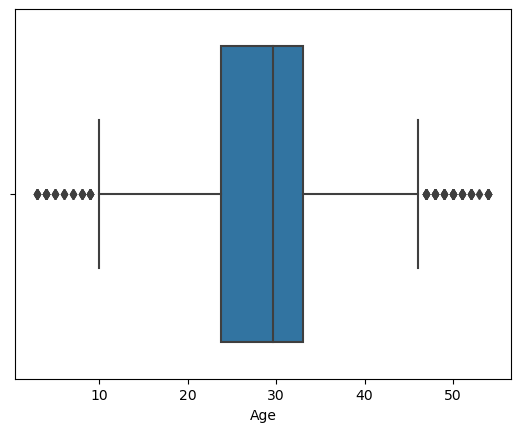

In [23]:
q1=df["Age"].quantile(0.25)
q2=df["Age"].quantile(0.50)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["Age"].loc[(df["Age"]>upper_tail)|(df["Age"]<lower_tail)]
mean_normalize=df["Age"].loc[(df["Age"]<=upper_tail)&
                                             (df["Age"]>=lower_tail)].mean()
df.loc[(df["Age"]>upper_tail)|(df["Age"]<lower_tail)]=mean_normalize
df["Age"].loc[(df["Age"]>upper_tail)|(df["Age"]<lower_tail)]
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Parch'>

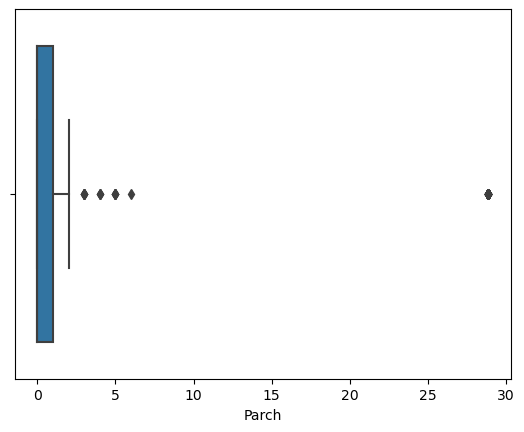

In [24]:
sns.boxplot(df["Parch"])

upper_tail: 2.5
lower_tail: -1.5


<AxesSubplot:xlabel='Parch'>

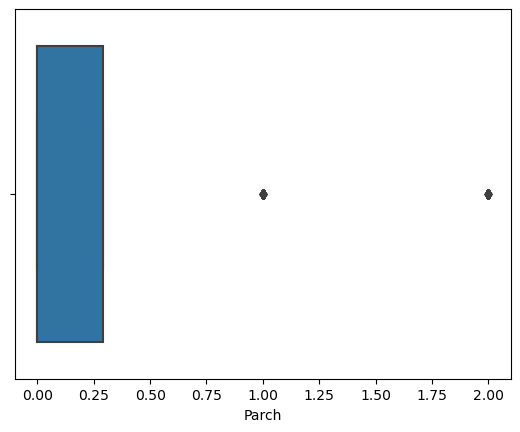

In [25]:
q1=df["Parch"].quantile(0.25)
q2=df["Parch"].quantile(0.50)
q3=df["Parch"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["Parch"].loc[(df["Parch"]>upper_tail)|(df["Parch"]<lower_tail)]
mean_Parch=df["Parch"].loc[(df["Parch"]<=upper_tail)&
                                             (df["Parch"]>=lower_tail)].mean()
df.loc[(df["Parch"]>upper_tail)|(df["Parch"]<lower_tail)]=mean_Parch
df["Parch"].loc[(df["Parch"]>upper_tail)|(df["Parch"]<lower_tail)]
sns.boxplot(df["Parch"])

<AxesSubplot:xlabel='Fare'>

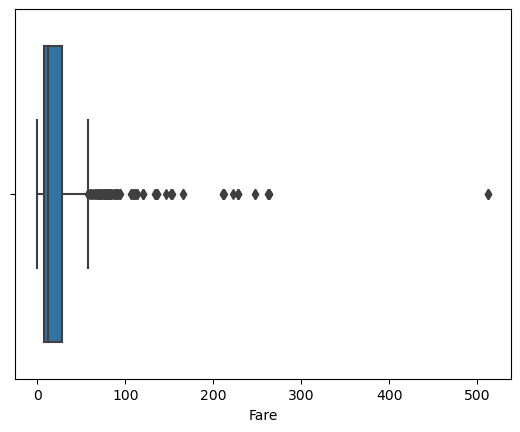

In [26]:
sns.boxplot(df["Fare"])

upper_tail: 57.6395
lower_tail: -22.143699999999995


<AxesSubplot:xlabel='Fare'>

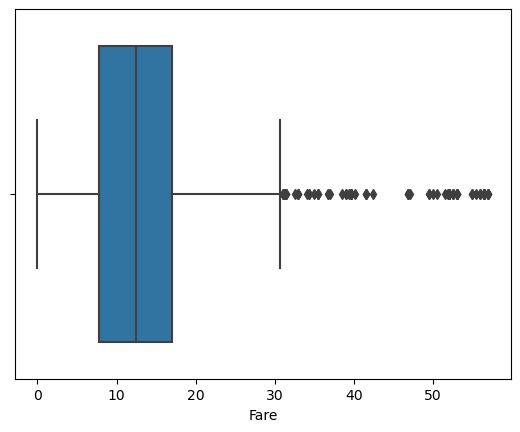

In [27]:
q1=df["Fare"].quantile(0.25)
q2=df["Fare"].quantile(0.50)
q3=df["Fare"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("upper_tail:",upper_tail)
print("lower_tail:",lower_tail)
df["Fare"].loc[(df["Fare"]>upper_tail)|(df["Fare"]<lower_tail)]
mean_normalize=df["Fare"].loc[(df["Fare"]<=upper_tail)&
                                             (df["Fare"]>=lower_tail)].mean()
df.loc[(df["Fare"]>upper_tail)|(df["Fare"]<lower_tail)]=mean_normalize
df["Fare"].loc[(df["Fare"]>upper_tail)|(df["Fare"]<lower_tail)]
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

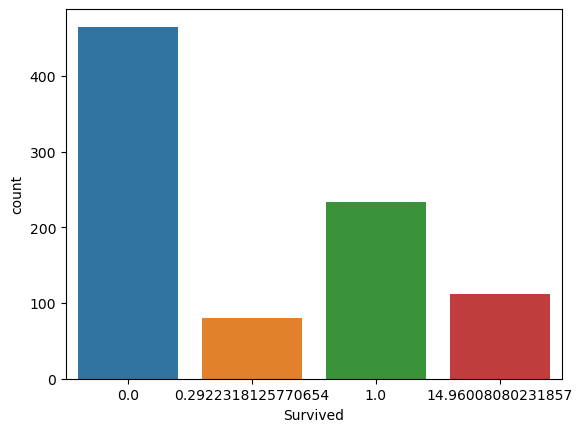

In [28]:
sns.countplot(x = df['Survived'])

In [29]:
# Drop unnecessary feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Gender    891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [30]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11,stratify=y)

# 6.Model Building

In [32]:
model=LogisticRegression()

In [33]:
model.fit(x_train,y_train)

LogisticRegression()

# 7.Model Training

In [34]:
# Testing
y_pred=model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
clf_report=classification_report(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*50)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*50)
print("Classification report:\n",clf_report)

Accuracy: 0.7430167597765364
**************************************************
Confusion Matrix:
 [[92 18]
 [28 41]]
**************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       110
           1       0.69      0.59      0.64        69

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



In [35]:
model.score(x_test, y_test)

0.7430167597765364

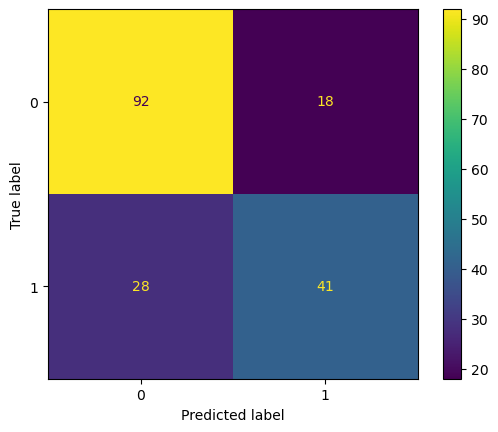

In [36]:
plot_confusion_matrix(model,x_test,y_test)

In [37]:
y_pred_prob=model.predict_proba(x_test)
y_pred_prob

array([[0.89509605, 0.10490395],
       [0.46456001, 0.53543999],
       [0.88859998, 0.11140002],
       [0.92419823, 0.07580177],
       [0.95320898, 0.04679102],
       [0.55599058, 0.44400942],
       [0.9114319 , 0.0885681 ],
       [0.06346406, 0.93653594],
       [0.04208918, 0.95791082],
       [0.8743608 , 0.1256392 ],
       [0.68875006, 0.31124994],
       [0.73769772, 0.26230228],
       [0.87173389, 0.12826611],
       [0.80561489, 0.19438511],
       [0.51173234, 0.48826766],
       [0.83655318, 0.16344682],
       [0.37269662, 0.62730338],
       [0.14822096, 0.85177904],
       [0.50723987, 0.49276013],
       [0.75458848, 0.24541152],
       [0.33156342, 0.66843658],
       [0.8655929 , 0.1344071 ],
       [0.72305767, 0.27694233],
       [0.90879186, 0.09120814],
       [0.91347109, 0.08652891],
       [0.04418367, 0.95581633],
       [0.84451288, 0.15548712],
       [0.88445115, 0.11554885],
       [0.94721293, 0.05278707],
       [0.92252224, 0.07747776],
       [0.

In [38]:
# training
y_pred_train=model.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
accuracy=accuracy_score(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print("Accuracy:",accuracy)
print("*"*50)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*50)
print("Classification report:\n",clf_report)

Accuracy: 0.8117977528089888
**************************************************
Confusion Matrix:
 [[376  61]
 [ 73 202]]
**************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       437
           1       0.77      0.73      0.75       275

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712



In [39]:
model.score(x_train, y_train)

0.8117977528089888

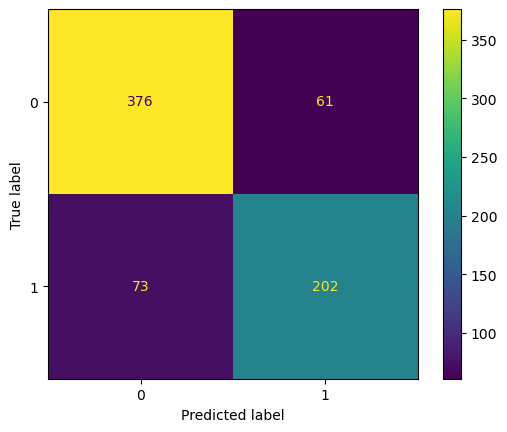

In [40]:
plot_confusion_matrix(model,x_train,y_train)

In [41]:
y_pred_prob=model.predict_proba(x_train)
y_pred_prob

array([[0.85734388, 0.14265612],
       [0.96988057, 0.03011943],
       [0.17611899, 0.82388101],
       ...,
       [0.8657198 , 0.1342802 ],
       [0.94898695, 0.05101305],
       [0.40780721, 0.59219279]])

In [42]:
# AUC-ROC

In [43]:
y_pred_prob = model.predict_proba(x_train)   
y_pred_prob[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

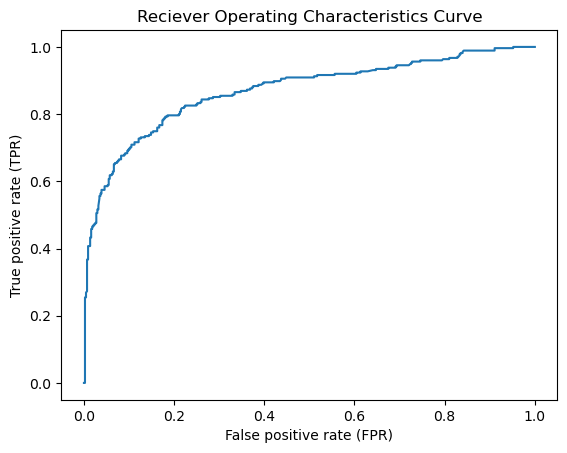

In [44]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("Reciever Operating Characteristics Curve")

In [45]:
auc_value = auc(fpr, tpr)
auc_value

0.8689244851258582

In [46]:
x.head(1).T

,0
Pclass,3.00
Gender,0.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Embarked,0.00


In [47]:
sex_value = {"female":0, "male":1}
smoker_value = {"no":0, "yes":1}

In [48]:
Gender_value={'male': 0, 'female': 1}
Embarked_value={'S': 0, 'C': 1, 'Q': 2}

In [49]:
column_names=x.columns

In [50]:
with open("logestic_model.pkl","wb") as f:
    pickle.dump(model,f)

In [51]:
json_data={"Gender":Gender_value,
          "Embarked":Embarked_value,
          "columns":list(column_names)}
json_data

{'Gender': {'male': 0, 'female': 1},
 'Embarked': {'S': 0, 'C': 1, 'Q': 2},
 'columns': ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']}

In [52]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

# Single User Input Testing

In [53]:
Pclass=3.00
Gender="male"
Age=22.00
SibSp=1.00
Parch=0.00
Fare=7.25
Embarked="S"

In [54]:
x.shape[1]

7

In [55]:
json_data["columns"]

['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [56]:
test_array=np.zeros(len(column_names))
test_array

array([0., 0., 0., 0., 0., 0., 0.])

In [57]:
test_array=np.zeros(len(column_names))
test_array[0]=Pclass
test_array[1]=json_data["Gender"][Gender]
test_array[2]=Age
test_array[3]=SibSp
test_array[4]=Parch
test_array[5]=Fare
test_array[6]=json_data["Embarked"][Embarked]

In [58]:
charges=round(model.predict([test_array])[0],2)
if charges==1:
    print("Survieved")
else:
    print("Not Survieved")
#print("Predicted medical insurance is:",charges,"/- Rs only")

Not Survieved
